TO DO: 

    - check if any columns exhibit a one-to-one mapping with the output label; if found, remove them.
    (delete URLSimilarityIndex, check URL and other high importance features)

    - implement a diffrent more complex model(random forest?, something with more layers)

    - add confusion matrix, recall, precision, f1 score?

Fetch phishing website classification dataset

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=327) #id=327 (32 columns, less rows) v id=967 (54 colums, more rows, too clean)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features.copy()
y = phiusiil_phishing_url_website.data.targets

# metadata 
print(phiusiil_phishing_url_website.metadata)   
# variable information 
print(phiusiil_phishing_url_website.feature) 

{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'published_in': 'International Conference for Internet Technology and Secured Tr

encode categorical columns

In [5]:
categorical_columns = []
X, y= shuffle(X, y)
for index, row in phiusiil_phishing_url_website.variables.iterrows():
    if row['type'] == 'Categorical':
        categorical_columns.append(row['name'])

label_encoder = LabelEncoder()

for x in categorical_columns[1:]:
    X.isetitem(X.columns.get_loc(x), label_encoder.fit_transform(X[x]))

print(categorical_columns)

[]


Split data, and train model

In [122]:
X, y= shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2)

DTC = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best', class_weight='balanced')
DTC = DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

print("accuracy: ",metrics.accuracy_score(y_test, y_pred))

accuracy:  0.9204339963833634


visualization od DTC

In [124]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualization of DTC
plt.figure(figsize=(20, 10), dpi=1000)
plot_tree(DTC, feature_names=X_train.columns, class_names=['phishing', 'not phishing'], filled=True)
plt.show()

TypeError: too many positional arguments

<Figure size 20000x10000 with 0 Axes>

Nonzero importance feature graph

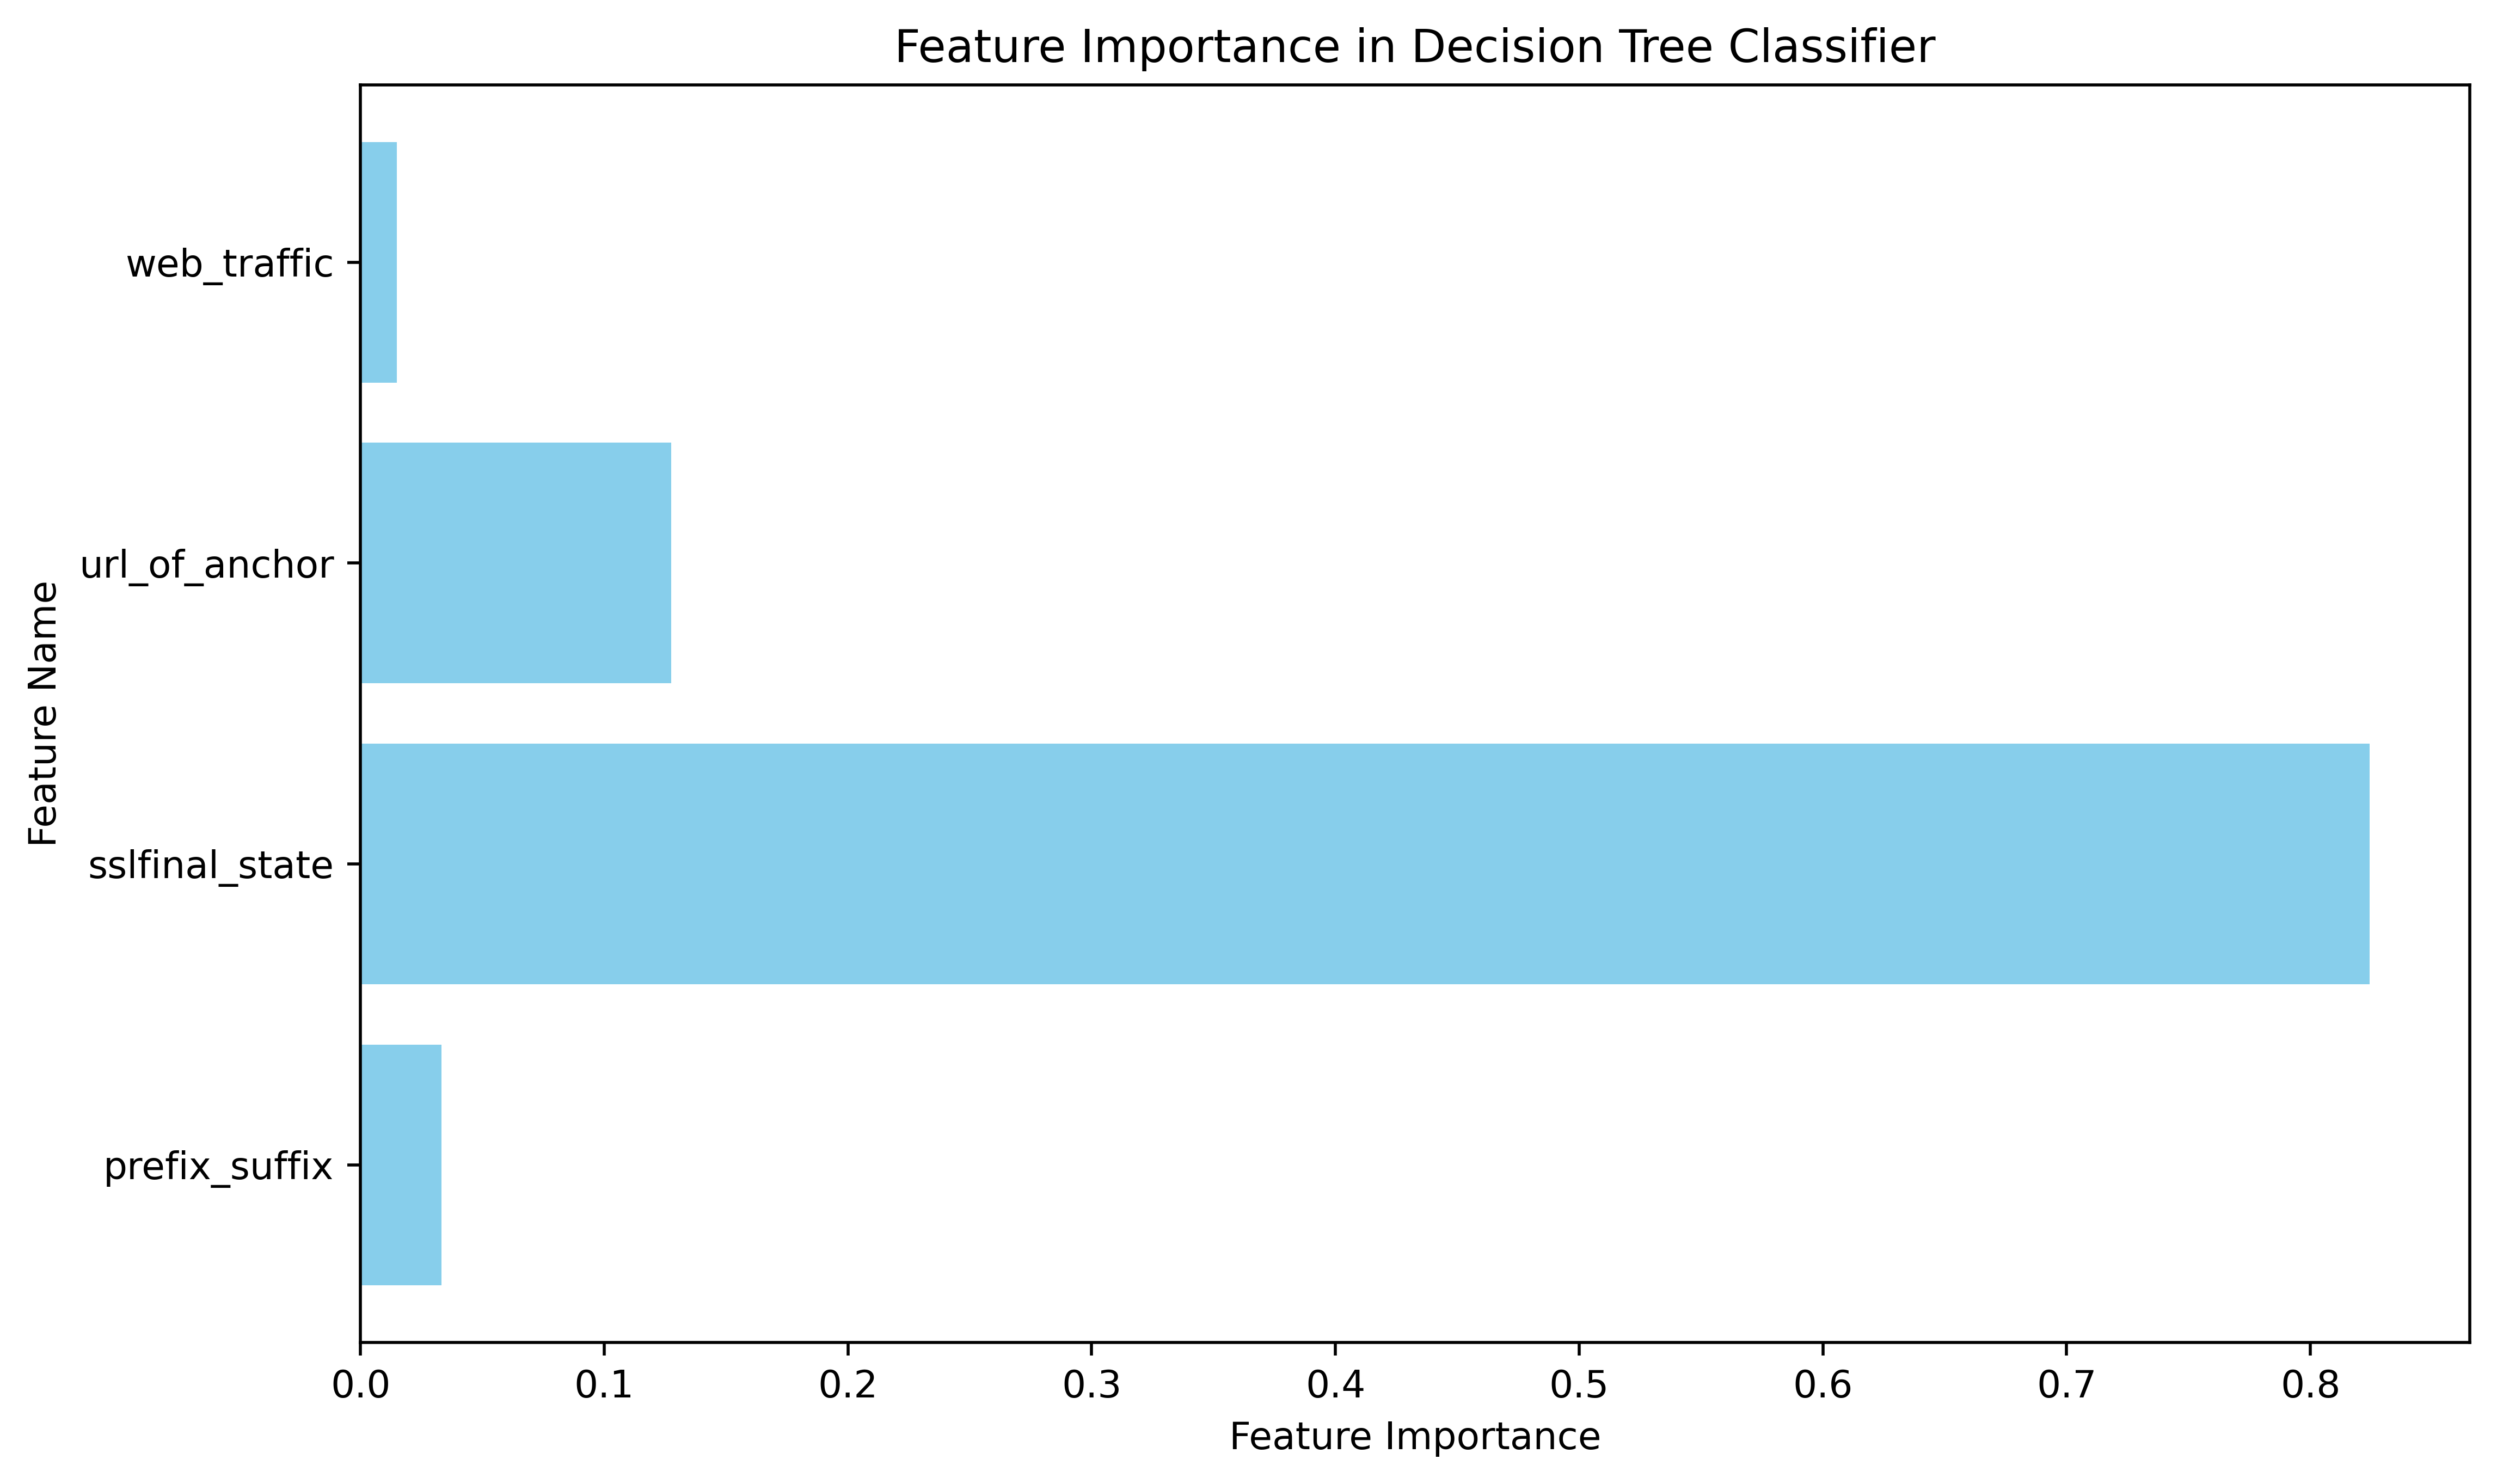

In [101]:
import matplotlib.pyplot as plt
feature_importance = DTC.feature_importances_
feature_names = X_train.columns
nonzero_feature_importance = feature_importance[feature_importance > 0]
nonzero_feature_names = feature_names[feature_importance > 0]

plt.figure(figsize=(10, 6), dpi=500)
plt.barh(nonzero_feature_names, nonzero_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()

Text visulaization of tree

In [102]:
from sklearn.tree import export_text
text_tree = export_text(DTC, feature_names=X_train.columns)
print(text_tree)

|--- sslfinal_state <= 0.50
|   |--- url_of_anchor <= -0.50
|   |   |--- web_traffic <= -0.50
|   |   |   |--- class: -1
|   |   |--- web_traffic >  -0.50
|   |   |   |--- class: -1
|   |--- url_of_anchor >  -0.50
|   |   |--- prefix_suffix <= 0.00
|   |   |   |--- class: -1
|   |   |--- prefix_suffix >  0.00
|   |   |   |--- class: 1
|--- sslfinal_state >  0.50
|   |--- url_of_anchor <= -0.50
|   |   |--- prefix_suffix <= 0.00
|   |   |   |--- class: -1
|   |   |--- prefix_suffix >  0.00
|   |   |   |--- class: 1
|   |--- url_of_anchor >  -0.50
|   |   |--- web_traffic <= 0.50
|   |   |   |--- class: 1
|   |   |--- web_traffic >  0.50
|   |   |   |--- class: 1



Model without URLSimiliarityIndex and URL column (only for dataset with id=967)

accuracy:  0.9994486736359973


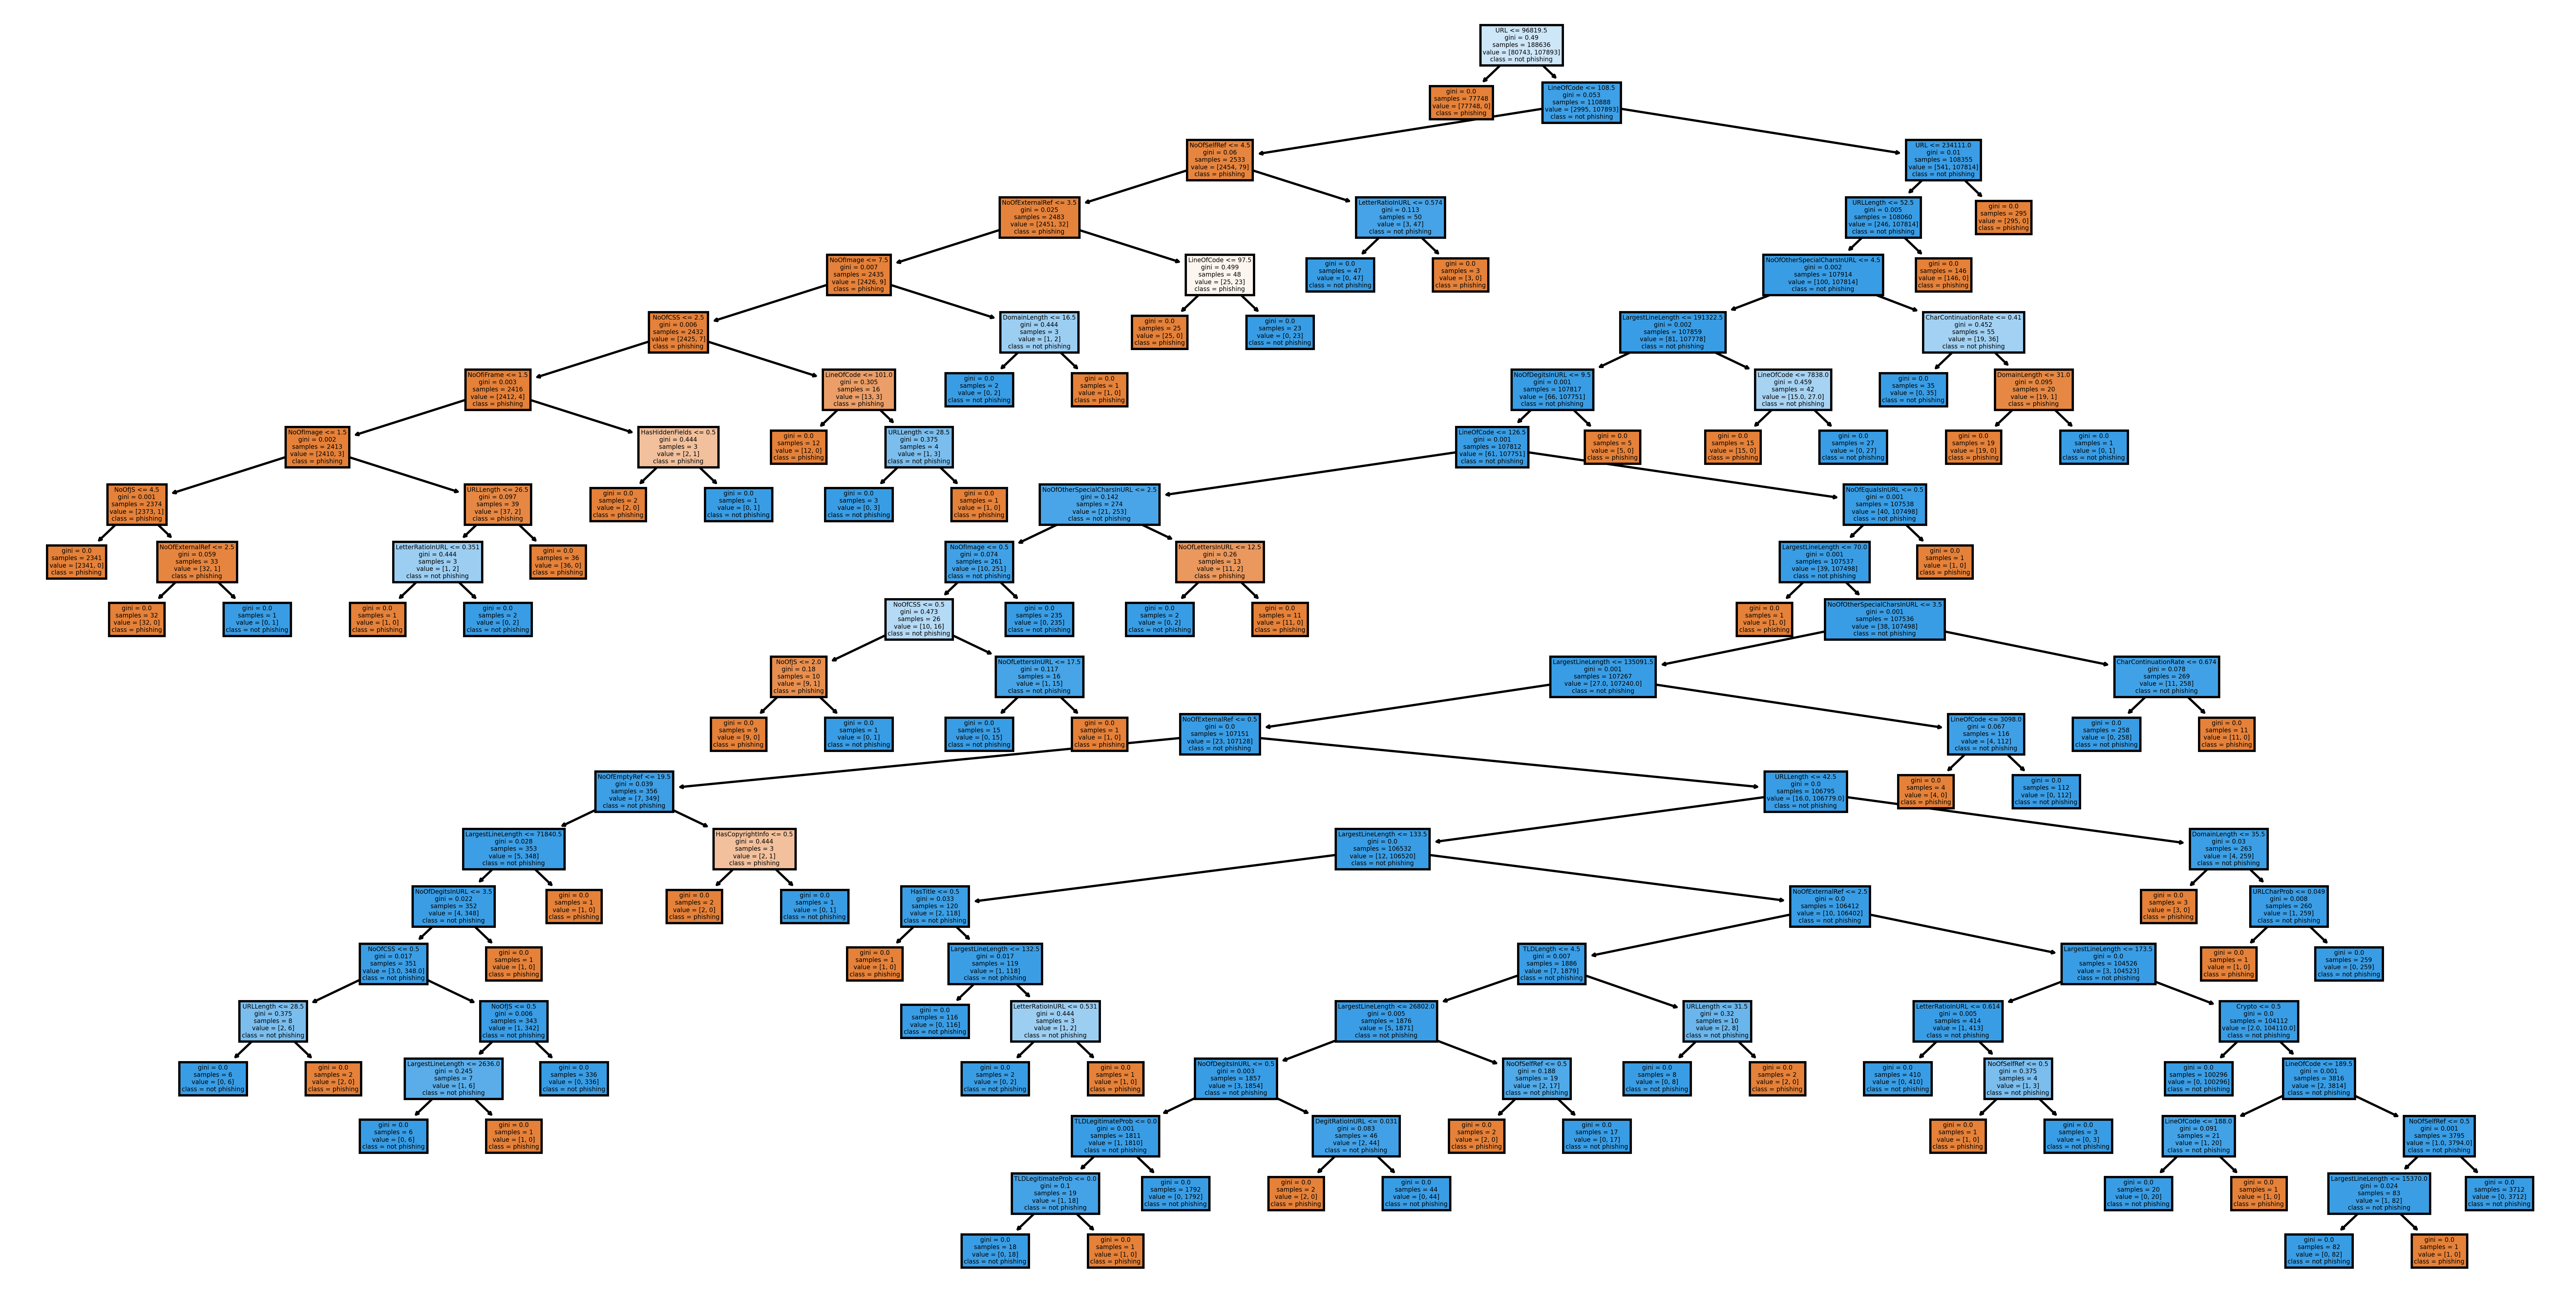

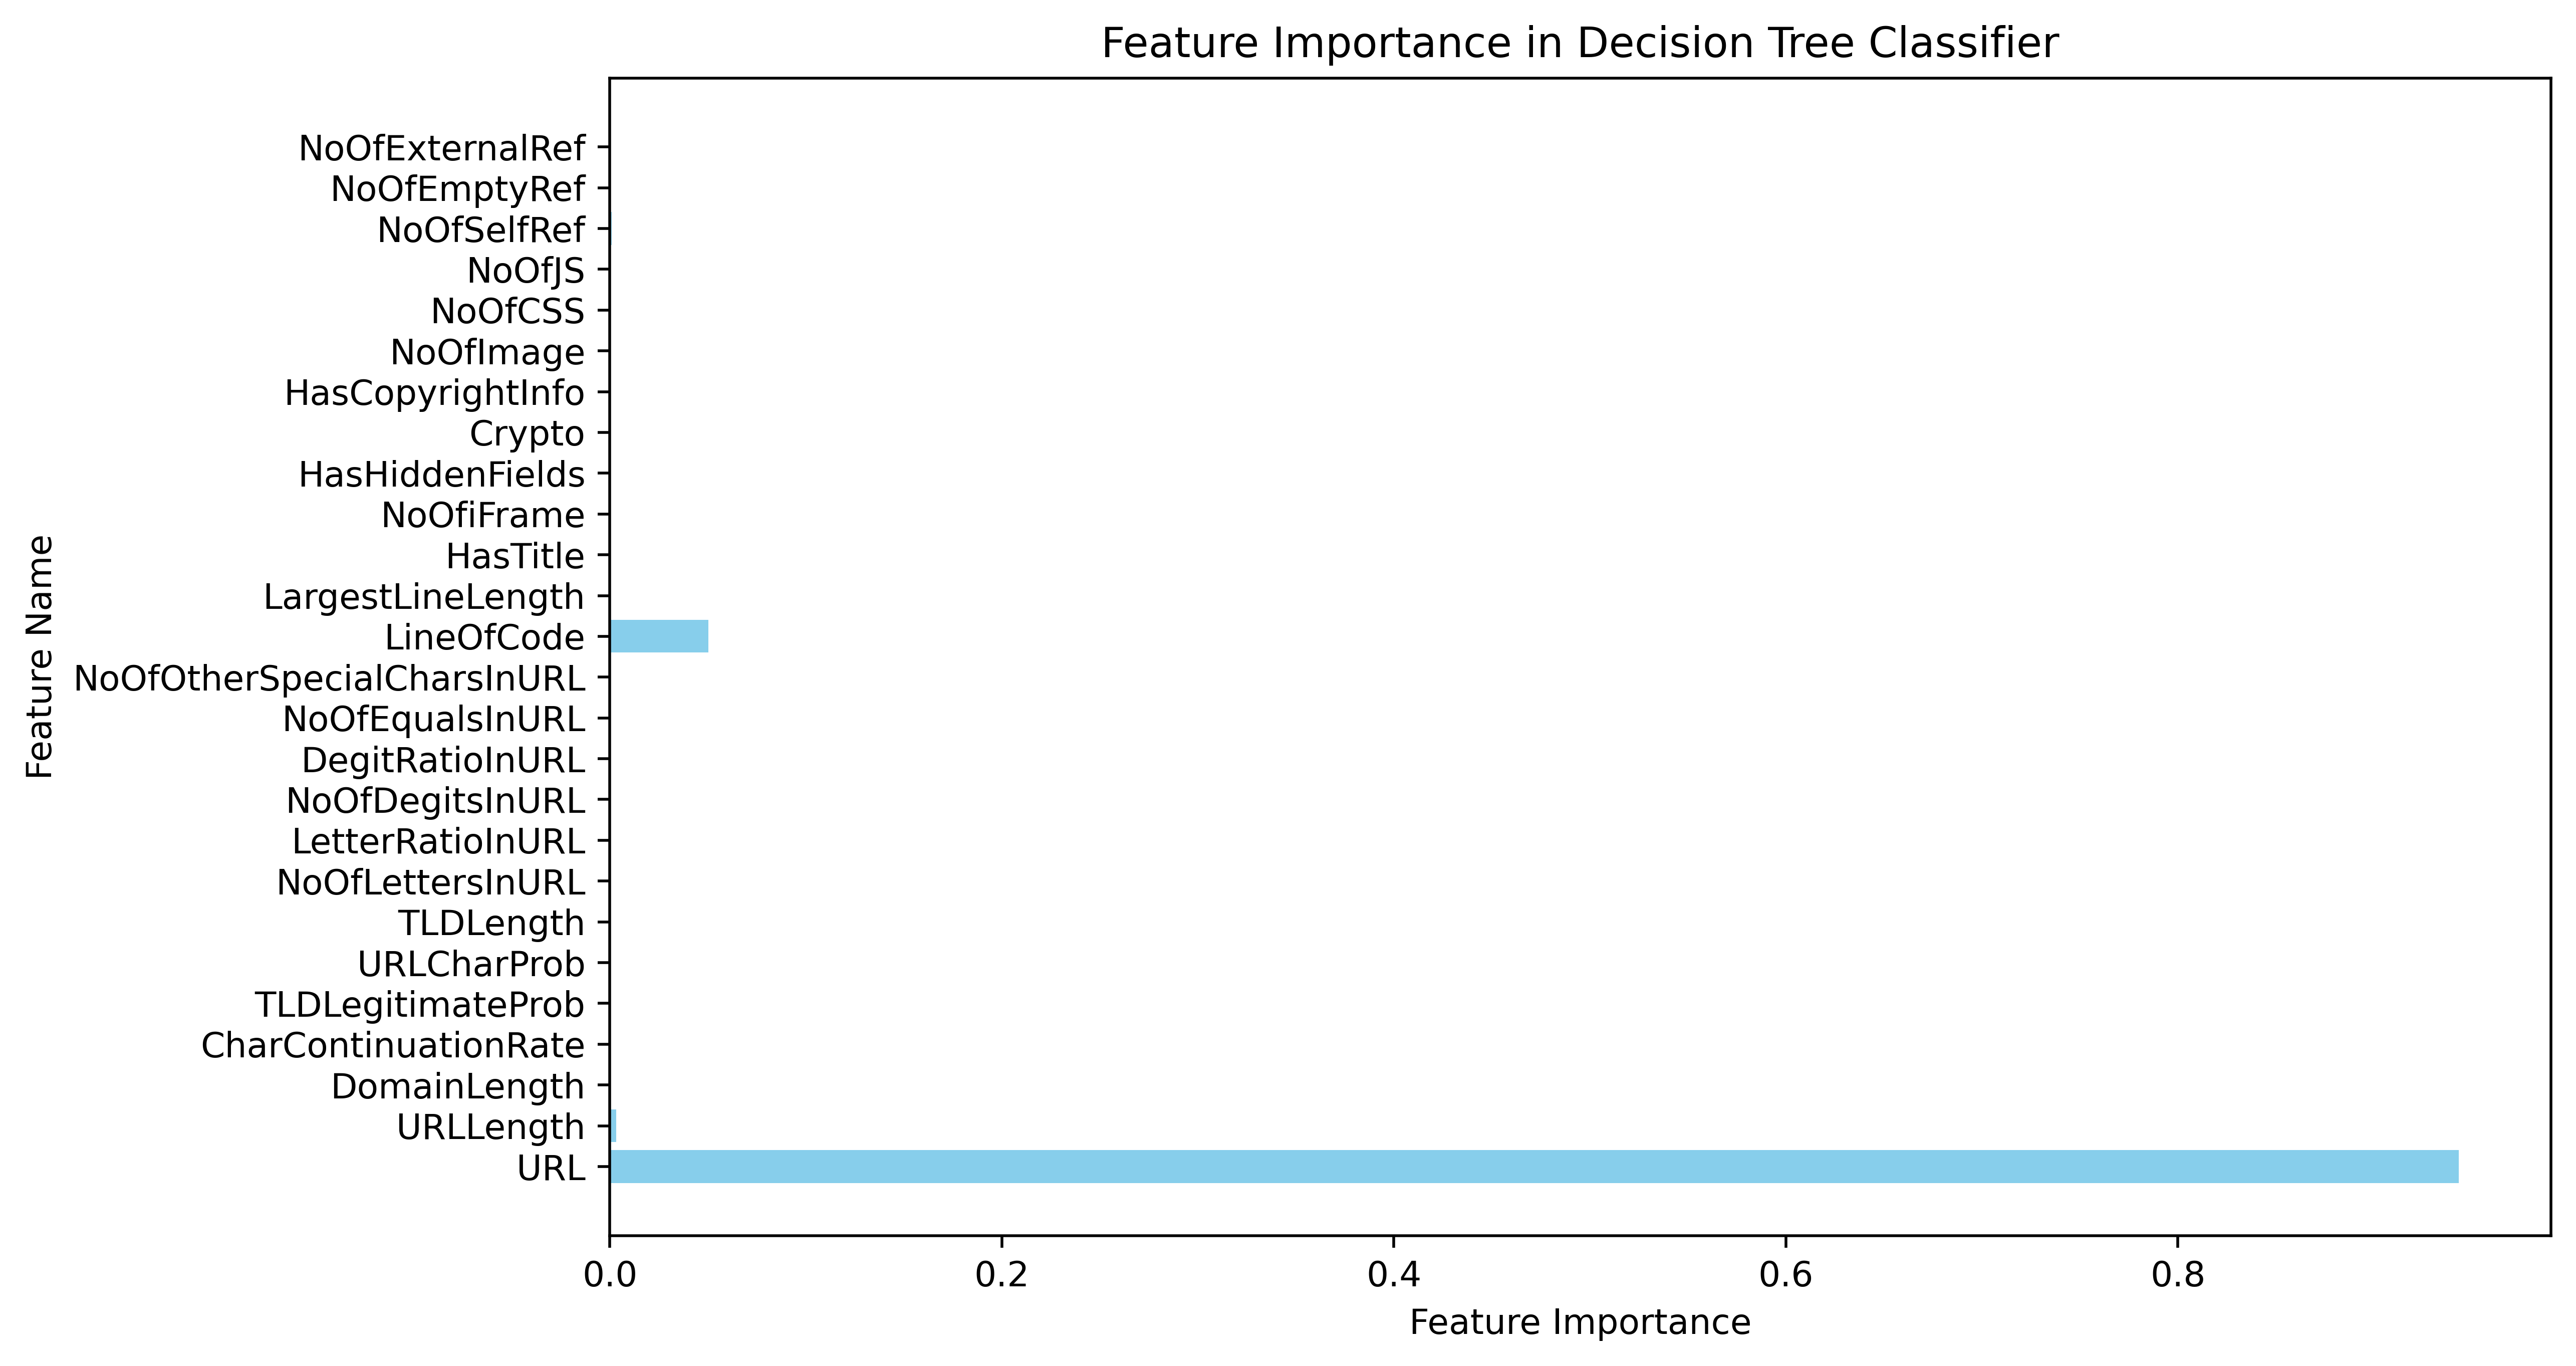

In [ ]:
del X["URLSimilarityIndex"]
del X["URL"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create Decision Tree classifer object
DTC = DecisionTreeClassifier()
# Train Decision Tree Classifer
DTC = DTC.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DTC.predict(X_test)
#Model accuracy
print("accuracy: ",metrics.accuracy_score(y_test, y_pred))

# visualization of DTC
plt.figure(figsize=(20, 10), dpi=500)
plot_tree(DTC, feature_names=X_train.columns, class_names=['phishing', 'not phishing'], filled=True)
plt.show()

feature_importance = DTC.feature_importances_
feature_names = X_train.columns
nonzero_feature_importance = feature_importance[feature_importance > 0]
nonzero_feature_names = feature_names[feature_importance > 0]

plt.figure(figsize=(10, 6), dpi=500)
plt.barh(nonzero_feature_names, nonzero_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()